# __Tutorial 1 : Basics__

__Discrete Fracture Networks__ are computational models explicitly representing the geometry of fractures in a network, and can be used as a basis for physical simulations (mechanical strength, flow, transport...)

In this tutorial, we will explain the basics of __DFN.Lab__, focusing on the main features.
<br>
The __DFNBasis__ module is the central one. It defines general objects such as: 
- _Fractures_ : a planar object (disk or polygon) defined by a size, an orientation and a position
- _Wells_ : a one dimensional object defined as a segment
- _System_ : a polyhedron object defined by boundaries and _Wells_
- _Discrete Fracture Network_ : a population of _Fractures_, contained in a _System_

We will need the __DFNBasis__, __GeometryLib__ and __RandomGenerator__ modules
<br>
We need the __DFNIO__ module for visualization. 
<br>
For rendering into the Jupyter Notebook, we use [_pyvista_](https://docs.pyvista.org).
<br>
![modules_dfnbasis](DFNBasis.jpg)


In [1]:
import dfnlab.DFNBasis as dfn
import dfnlab.GeometryLib as geom
import dfnlab.DFNIO as dfn_io
import pyvista as pv

## How to create Fractures ?
You can create a _Fracture_ as a disk


In [2]:
fdisk1 = dfn.Fracture([0, 0, 0], 2.,45.,90.) # disk_center=[0,0,0], diameter=2, dip=45°, dip_direction=90°

print("Fracture size is {}".format(fdisk1.getSize()))
print("Fracture area is {}".format(fdisk1.getArea()))

Fracture size is 2.0
Fracture area is 3.141592653589793


You can also define a _Fracture_ orientation from a normal vector

In [3]:
normal = dfn.IFracture.orientations(30.,270.) # normal vector for a plane defined by dip=30° and dip_direction=270°
fdisk2 = dfn.Fracture([0, 0, 0], 4.,normal)

You can also create a _Fracture_ from a _Polygon_, defined as a set of points

In [4]:
pol = geom.Polygon()
pol.append([0, 0, 0])
pol.append([4, 0, 0])
pol.append([4, 4, 0])
pol.append([0, 4, 0])
fpol = dfn.Fracture(pol)

print("Fracture size is {}".format(fpol.getSize()))
print("Fracture area is {}".format(fpol.getArea()))

Fracture size is 5.656854249492381
Fracture area is 16.0


## How to create a DFN from a fracture set ?

We first define a _System_ as a box including a _Well_

In [5]:
system = dfn.System()
system.buildParallelepiped([0.,0.,0.],5.,5.,5.) # the system is a box of size lx=5, ly=5, lz=5, centered in [0,0,0]
well = dfn.Well1D([0,0,-2.5], [0,0,2.5])
system.addWellTunnel(well)

A _DFN_ is defined as a population of _Fractures_ contained in a _System_.

In [6]:
fnet = dfn.DFN(system)
fnet.addFractures([fdisk1,fdisk2])
fnet.addFracture(fpol)
fnet.computeIntersections()

print("Number of fractures: {}".format(fnet.nbFractures()))
print("Number of intersections between fractures: {}".format(fnet.nbIntersections(0)))
print("Number of intersections with wells: {}".format(fnet.nbIntersections(1)))
print("Total fracture surface per unit volume is: {}".format(fnet.density()))

Number of fractures: 3
Number of intersections between fractures: 3
Number of intersections with wells: 3
Total fracture surface per unit volume is: 0.17566370614359178


## Visualization

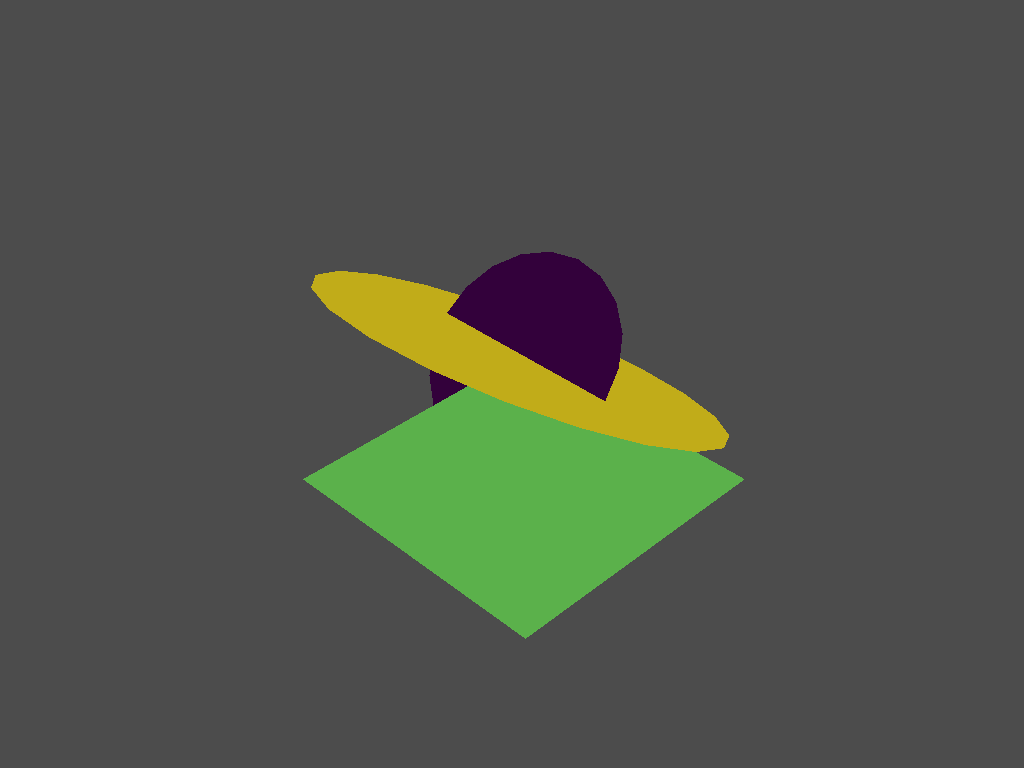

In [7]:
dfn_io.write_DFN_file(fnet,'dfn.vtp')

visu = pv.read('dfn.vtp')
p = pv.Plotter(notebook=True)
p.add_mesh(visu,show_scalar_bar=False)
p.show(auto_close=False, use_panel=False)